In [1]:

### Импорт библиотек
import importlib

from IPython.display import Latex

import snj_solvers
importlib.reload(snj_solvers)
import LATEX_OUTPUT as la_o

from LATEX_OUTPUT import op_latex_output as _ol
from LATEX_OUTPUT import display_latex_ex_ as _dl
from LATEX_OUTPUT import display_latex_ex_2 as _dl2
importlib.reload(la_o)

#def dl(ddd):LATEX_OUTPUT.display_latex_ex(ddd)
# Графики
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker

# plt.style.use({
#                'font-family':'Times new roman'
#                })
#
#mpl.rcParams.update(mpl.rcParamsDefault)
# plt.rcParams.update({
#     "fontname":"Times new roman",
# })


# Единицы измерения
from pint import get_application_registry, Quantity
un = get_application_registry()
Q = Quantity



import numpy as np

# Термодинамические свойства воды и водяного пара
import TCPv2
from TCPv2 import ThPoint
importlib.reload(TCPv2)


\begin{dcases}{D }_{1} = 10\ meter \\ {D }_{2} = 30\ meter \\ {D }_{3} = 20\ meter \\ {D }_{4} = 40\ meter \\ \end{dcases}
\begin{dcases}{D }_{1} = 10\ meter \\ {D }_{2} = 30\ meter \\ {D }_{3} = 20\ meter \\ {D }_{4} = 40\ meter \\ \end{dcases}


<module 'TCPv2' from 'e:\\REMOTE\\YandexDisk\\МЭИ\\ДИПЛОМ\\Часть №2\\Разбивка\\TCPv2.py'>

In [2]:
# Начальные данные 


# Внутренний КПД ЦВД
etaHPC_oi = 0.846

# Перед клапанами
fp_0_ = Q(9, "MPa")
ft_0_ = Q(571, "degC")

# Тоже самое, что и fpВД_0 (fpHP_0)

fPoint_0_ = ThPoint(p=fp_0_, t=ft_0_)
_dl2([
    ("FULL 0b", fPoint_0_)
])

<IPython.core.display.Latex object>

In [3]:
# Точка после клапанов
fh_0 = fPoint_0_.h()
fp_0 = Q(8.73, "MPa")

fPoint_0 = ThPoint(p=fp_0, h=fh_0)
_dl2([
    ("FULL 0", fPoint_0)
])

<IPython.core.display.Latex object>

In [4]:
# Другие входные данные

# Частота вращения ротора 
n = Q(90, "1/s") 

# Он же 2DHP_0
G_0 = Q(38.88, "kg/s")

# Он же p_пк
p_z = Q(1.8, "MPa")

# TODO варируемая величина
Z = 6 

In [5]:
# Основные варируемые величины

# Степень реактивности первой нерегулируемой ступени в корне 
# [0.03-0.07]
rho_k = 0.05#np.mean([0.03,0.07])

# Эффективный угол выхода потока из сопловой решетки
# [10-14]degC - для турбин малой мощности
# [13-16]degC - для турбин большой мощности
# Так как турбина малой мощности, то
alpha_1eef = 14 * un("deg")#np.mean([10,14]) * un("deg")

# Коэффициент скорости сопловой решетки
# [0.93-0.96]
phi = np.mean([0.93, 0.96])

# Коэффициент расхода сопловой решетки первой нерегулируемой ступени
# [0.95-0.97]
mu = np.mean([0.95,0.97])

# Перекрыша между высотами лопаток первой нерегулируемой ступени
Delta = Q(0.003, "meter")
d_1 = Q(0.7, "meter") 

_dl([
    ("d_{1}", d_1),
    ("\\rho_k", rho_k),
    ("\\alpha_{1эф}",alpha_1eef),
    ("\\varphi", phi),
    ("\\mu", mu),
    ("\\Delta", Delta)
])

<IPython.core.display.Latex object>

In [6]:
### Непосредственный расчет (разбивка группы ступеней) (1ая)

# 1. Средний диаметр первой ступени:
# TODO!--- ВАРИРУЕМАЯ ВЕЛИЧИНА ---!


In [7]:
# 2. Энтропия и температура пара перед первой ступенью
_dl2([
    ("\={s}_{0}", fPoint_0.s()),
    ("\={h}_{0}", fPoint_0.h())
])

<IPython.core.display.Latex object>

In [8]:
# 3. Определяем высоту первой нерегулируемой ступени, для этого задаемся величиной обратной веерности
# theta = d_1/l_1
# TODO!--- ВАРИРУЕМАЯ ВЕЛИЧИНА ---!

theta = 20
iterations_number = 0
percent_difference = 0.0
l_11 = 0
uDIVu_cf = 0
fH_01 = 0
h_2t = 0
v_2t = 0

while (True):
    # 3.1. Величина обратной веерности
    # ...
    
    # 3.2. Определяем степень реактивности на среднем диаметре
    rho = rho_k + 1.8/(theta+1.8)
    
    # 3.3. Определяем оптимальное значение u/c_f
    uDIVu_cf = phi*np.cos(alpha_1eef)/(2*np.sqrt(1-rho))
    
    # 3.4. Определяем располагаемый теплопеперад по параметрам торможения при оптимальном
    # u/c_f для первой ступени 
    fH_01 = 12300 * np.power((d_1 * n)/(uDIVu_cf * 50),2)
    
    # 3.5. Определяем теоретическое значение энтальпии за первой ступенью
    h_2t = fh_0 - fH_01
    
    # 3.6. Определяем удальный объем пара за первой нерегулируемой ступенью при
    # изоэнтропном процессе расширения по свойствам воды и водяного пара
    Point_2t = ThPoint(h=h_2t, s=fPoint_0.s())
    v_2t = Point_2t.v()
    
    # 3.7. Определеяем высоту первой нерегулируемой ступени
    l_11 = (G_0 * v_2t * uDIVu_cf)/(np.power(np.pi*d_1,2) * n * np.sqrt(1-rho) * np.sin(alpha_1eef) * mu)
    
    # 3.8. Определяем окончательное значение обратной веерности и проверяем его
    
    # Проверка условия 
    # Если получившаяся величина больше, чем заданная
    if (d_1/l_11 > theta):
        # То вычитаем отношение из единицы
        percent_difference = (1 - theta/(d_1/l_11)) 
    # Если величина меньше, чем заданная
    else:
        # То вычитаем из отношения единицу
        percent_difference = (theta/(d_1/l_11) - 1)
    
    # Если условие выполнилось - выходим из цикла
    if (np.abs(percent_difference) < 0.01):
        break
    # Иначе добавляем итерацию и меняем приближающее значение на найденное в процессе цикла
    else:
        iterations_number += 1
        theta = (d_1/l_11)
print("При расчете высоте лопатки и определения веерности проделано {} итерации и погрешность составляет {}%".format(iterations_number, percent_difference.magnitude*100))
_dl([
    ("\\rho", rho),
    ("\\bigg(\\frac{u}{c_f}\\bigg)_{опт}", uDIVu_cf),
    ("\={H}_{01}",fH_01.to('kJ/kg')),
    ("h_{2t}", h_2t),
    ("v_{2t}", v_2t),
    ("\\theta_1", theta),
    ("\\frac{{1}}{{\\theta}}", 1/theta),
    ("l_{{11}}", l_11)
])

При расчете высоте лопатки и определения веерности проделано 2 итерации и погрешность составляет 0.11056241131103262%


<IPython.core.display.Latex object>

In [9]:
# 4. Определяем высоту рабочей лопатки первой нерегулируемой ступени
l_21 = l_11 + Delta

_dl([
    ("l_{{21}}", l_21)
])

<IPython.core.display.Latex object>

In [10]:
# 5. Определяем корневой диаметр ступени
d_k = d_1 - l_21

_dl([
    ("d_к", d_k)
])

<IPython.core.display.Latex object>

In [11]:
# 6. Определяем параметры пара за последней ступенью ЦВД



# 6.1. Значение энтальпии пара при изоэнтропном расширении пара в ЦВД:
# Термодинамическая точка zt
Point_zt = ThPoint(p=p_z, s=fPoint_0.s())
# Энтальпия
h_zt = Point_zt.h()

# 6.2. Теоретический перепад на отсек нерегулируемых ступеней ЦВД:
fH_0 = fh_0 - h_zt

# 6.3. Действительный теплоперепад на отсек нерегулируемых ступеней ЦВД
H_i = fH_0 * etaHPC_oi

# 6.4. Действительное значение энтальпии за ЦВД (за последней ступенью)
h_z = fh_0 - H_i

# 6.5 Действительный объем за ЦВД (за последней ступенью)
# Термодинамическая точка 2z
Point_2z = ThPoint(p=p_z, h=h_z)
v_2z = Point_2z.v()

_dl2([
    ("zt", Point_zt),
    ("h_{z}", h_z),
    ("v_{2z}", v_2z)
])

<IPython.core.display.Latex object>

In [12]:
# 7. Определяем высоту рабочей лопатки последней ступени исходя из
# из предположения о том, что удельный объем в цилиндре имзеняется 
# линейно, а так же учитывая закон постоянства корневого диаметра в
# проточной части ЦВД. Для этого решается квадратное уравнение
# относительно неизвестной величины
# l_2z**2 + l_2z*d_k = l_21 * d_21 * v_2z / v_2t

l_2z = snj_solvers.solve__(
    [
        ('l_2z**2 + l_2z * d_k', 'l_21 * d_1 * v_2z / v_2t'),
    ],
    
    [
        ('d_k',  d_k),
        ('l_21', l_21),
        ('d_1',  d_1),
        ('v_2z', v_2z),
        ('v_2t', v_2t)
    ],
    
    [
        'l_2z'
    ],
    list_mode=True
)

l_2z = snj_solvers.return_positive(l_2z[0], l_2z[1])
_dl2([
    ('l_{2z}', l_2z)
])

<IPython.core.display.Latex object>

In [13]:
# 8. Определеяем средний диаметр последгней ступени ЦВД
d_2z = d_k + l_2z

_dl2([
    ("d_{2z}", d_2z)
])

<IPython.core.display.Latex object>

In [14]:
# 9. Определяем основные параметры первой и последней ступени
# 9.1. Обратная веерность
theta_1 = (l_21 + d_k)/l_21
theta_z = (l_2z + d_k)/l_2z
_dl2([
    ('\\theta_{1}', theta_1),
    ('\\theta_{z}', theta_z)
])

<IPython.core.display.Latex object>

In [15]:
# 9.2. Степень реактивности
rho_1 = rho_k + 1.8/(theta_1 + 1.8)
rho_z = rho_k + 1.8/(theta_z + 1.8)

_dl2([
    ('\\rho_{1}', rho_1),
    ('\\rho_{z}', rho_z)
])

<IPython.core.display.Latex object>

In [16]:
# 9.3. Оптимальное значение u/c_f
uDIVu_1 = phi*np.cos(alpha_1eef)/(2*np.sqrt(1-rho_1))
uDIVu_z = phi*np.cos(alpha_1eef)/(2*np.sqrt(1-rho_z))

_dl2([
    ("\\bigg(\\frac{u}{c_ф}\\bigg)_1", uDIVu_1),
    ("\\bigg(\\frac{u}{c_ф}\\bigg)_z", uDIVu_z)
])

<IPython.core.display.Latex object>

In [17]:
# 10. Производим разбивку теплоперепадов
# 10.1. Предполагаем, что средний диаметр ступеней и высота лопаток
# высота лопаток изменяются вдоль ЦВД линейно. Тогда можно построить
# диаграммы их изменения для цилиндра с количеством ступеней (Z).
# Таким образом из графиков или по формуле, для каждой ступени имеем
# величину среднего диаметра и высоты рабочей лопатки.

%matplotlib inline


# Для определения диаметра в каждой ступени необходимо объявить соответствующую функцию
# Так как средний диамтр ЦВД изменяется линейно, то функция может быть задана в виду d(z_i)=k*z_i+b
# Определим коэффиценты уравнения из заданных точек:
k_for_d,b_for_d = snj_solvers.solve__(
    [
        ('d_1',  'k*z_1 + b'),
        ('d_2z', 'k*z_z + b'),
    ],
    [
        ('d_1', d_1),
        ('d_2z', d_2z),
        ('z_1', 1),
        ('z_z', Z)
    ],
    [
        'k','b'
    ],
    list_mode=True)

k_for_l,b_for_l = snj_solvers.solve__(
    [
        ('l_21',  'k*z_1 + b'),
        ('l_2z', 'k*z_z + b'),
    ],
    [
        ('l_21', l_21),
        ('l_2z', l_2z),
        ('z_1', 1),
        ('z_z', Z)
    ],
    [
        'k','b'
    ],
    list_mode=True)

class linear_fun_by_number:
    def __init__(self, in_k,in_b):
        self._k = in_k
        self._b = in_b
    
    # получить значение линейной функции
    def get(self, in_z):
        return self._k * in_z + self._b
    
    # получить значение линейной функции без размерности
    def get_no_dim(self, in_z):
        return self.get(in_z).m

    # получить значение линейной функции приведенной к заданной размерности, но без нее
    def get_to_dim_no_dim(self, in_z, dim):
        return self.get(in_z).to(dim).m

# вектора для хранения данных
d_vec = np.array([])
l_vec = np.array([])

# Номера ступеней в массиве
vec_stages_number = np.arange(1, Z+1, 1)

# Диаметры ступеней в массиве

# Функция для определения диаметра от номера ступени
d_fun_handler = linear_fun_by_number(k_for_d,b_for_d)

# Функция для определения высоты лопатки от номера ступени
l_fun_handler = linear_fun_by_number(k_for_l,b_for_l)

for i in range(1, Z+1):
    d_vec = np.append(d_vec, d_fun_handler.get(i))
    l_vec = np.append(l_vec, l_fun_handler.get(i))
_dl2([
    ("d ORIGIN", d_vec),
])

<IPython.core.display.Latex object>

In [18]:
_dl2([
    ("l ORIGIN", l_vec)
])

<IPython.core.display.Latex object>

In [19]:
# 10.2. Для каждой ступени определяем обратную веерность 
theta_vec = (l_vec + d_k )/ l_vec


_dl2([
    ('\\theta ORIGIN',theta_vec)
])

<IPython.core.display.Latex object>

In [20]:
# 10.3. Для каждой ступени определяем степень реактивности
rho_vec = rho_k + 1.8/(theta_vec + 1.8)
_dl2([
    ('\\rho ORIGIN',theta_vec)
])

<IPython.core.display.Latex object>

In [21]:
# 10.4. Для каждой ступени определяем величину u/c_f
uDIVc_f_vec = phi*np.cos(alpha_1eef)/(2*np.sqrt(1-rho_vec))
_dl2([
    ("\\bigg(\\frac{u}{c_ф}\\bigg)_{} ORIGIN",uDIVc_f_vec)
])

<IPython.core.display.Latex object>

In [22]:
# 10.5. Для каждой ступени определяем теплоперепад по статическим параметрам

# вектор коэффициентов
K_vec = np.empty(Z)
K_vec.fill(0.95)
K_vec[0] = 1.0

H_vec = 12300 * (d_vec/uDIVc_f_vec)**2 * (n/50)**2 * K_vec
H_vec.ito('kJ/kg')

_dl2([
    
    ("H ORIGIN", H_vec.to("kJ/kg"))
])

<IPython.core.display.Latex object>

In [23]:
# 10.6. Определяем среднее значение теплоперепадов
H_0ave = np.mean(H_vec)

_dl2([
    ("H_{0ср}", H_0ave)
])

<IPython.core.display.Latex object>

In [24]:
# 10.7 Определяем коэффициент возврата теплоты:
q_t_koef = 4.8*10**(-4) * un('kg/kJ')
q_t = q_t_koef*(1 - etaHPC_oi)*H_0ave*(Z-1)/Z

_dl2([
    ("q_{t}", q_t.to(''))
])

<IPython.core.display.Latex object>

In [25]:
# 10.8. Новое значение количества ступеней ЦВД
Z_new = fH_0 * (1+q_t)/H_0ave
Z_new.ito('')

_dl2([
    ("Z_{новое}", Z_new)
])

<IPython.core.display.Latex object>

In [26]:
# 11. Определяем невязку после разбивки теплоперепадов
Delta_H = (fH_0*(1+q_t) - np.sum(H_vec))/Z

_dl2([
    (r"\Delta", Delta_H)
])

<IPython.core.display.Latex object>

In [27]:
# 12. Уточняем значение теплоперепадов на каждую ступень с учетом невязок
H_new_vec = H_vec + Delta_H

c:\prog\py\lib\site-packages\matplotlib\cbook\__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


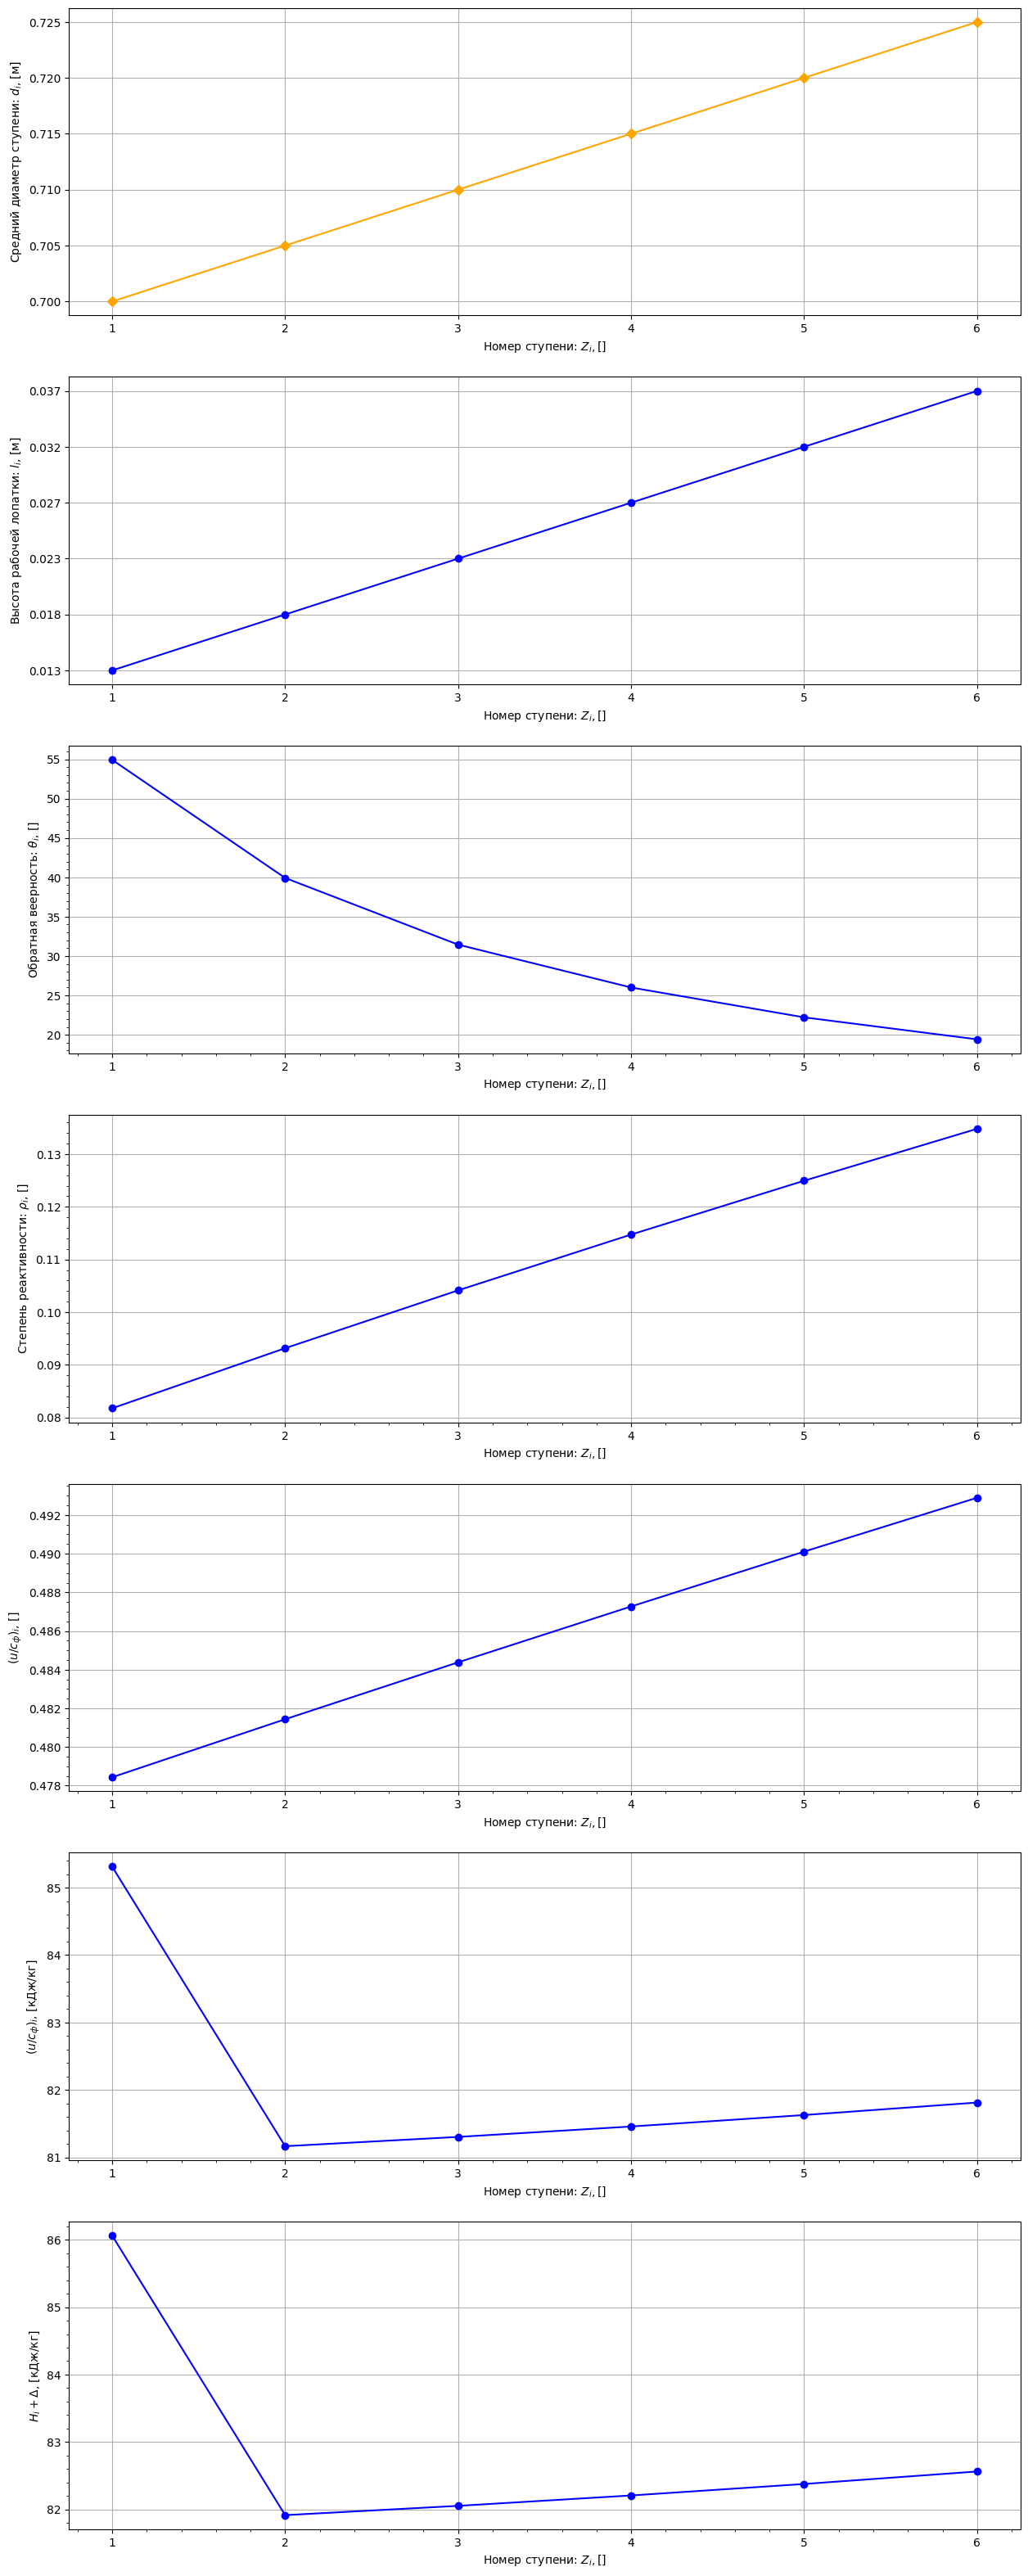

In [28]:
# Графики    
fig,axs = plt.subplots(figsize=(15,40),nrows=7, ncols=1)

# Для зависимости диаметров
axs[0].plot(vec_stages_number, d_vec.m, **{'marker': 'D'}, color='orange')
axs[0].set_xlabel('Номер ступени: $Z_{i}, []$')
axs[0].set_ylabel("Средний диаметр ступени: $d_{i}$, [м]", **{'fontname':'sans-serif'})
#axs[0].text(1.5,0.837, 'Общее количество ступеней: $Z={}$'.format(Z), **{'fontname':'DejaVu Sans'})
axs[0].yaxis.set_major_locator(ticker.IndexLocator(base=(d_vec[1] - d_vec[0]).m, offset=0))
axs[0].xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
axs[0].grid(True)

# Для зависимости высот лопаток
axs[1].plot(vec_stages_number, l_vec, **{'marker': 'o'}, color='blue')
axs[1].set_xlabel('Номер ступени: $Z_{i}, []$')
axs[1].set_ylabel('Высота рабочей лопатки: $l_{i}$, [м]', **{'fontname':'sans-serif'})

plot_delta_l = l_fun_handler.get_no_dim(2) - l_fun_handler.get_no_dim(1)
axs[1].yaxis.set_major_locator(ticker.IndexLocator(base=plot_delta_l, offset=0))
axs[1].xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
axs[1].grid(True)

# Для обратной веерности
axs[2].plot(vec_stages_number, theta_vec, **{'marker': 'o'}, color='blue')
axs[2].set_xlabel('Номер ступени: $Z_{i}, []$')
axs[2].set_ylabel('Обратная веерность: $\\theta_{i}$, []', **{'fontname':'sans-serif'})
axs[2].yaxis.set_minor_locator(ticker.MultipleLocator(5))
axs[2].minorticks_on()
axs[2].xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
axs[2].grid(True)

# Для степени реактивности
axs[3].plot(vec_stages_number, rho_vec, **{'marker': 'o'}, color='blue')
axs[3].set_xlabel('Номер ступени: $Z_{i}, []$')
axs[3].set_ylabel('Степень реактивности: $\\rho_{i}$, []', **{'fontname':'sans-serif'})
axs[3].xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
plot_delta_rho = rho_vec[1] - rho_vec[0]
axs[3].yaxis.set_minor_locator(ticker.MultipleLocator(5))
axs[3].minorticks_on()
axs[3].grid(True)

# Для отношения U/c_f
axs[4].plot(vec_stages_number, uDIVc_f_vec, **{'marker': 'o'}, color='blue')
axs[4].set_xlabel('Номер ступени: $Z_{i}, []$')
axs[4].set_ylabel('$(u/c_{ф})_{i}$, []', **{'fontname':'sans-serif'})
axs[4].xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
axs[4].yaxis.set_minor_locator(ticker.MultipleLocator(5))
axs[4].minorticks_on()
axs[4].grid(True)

# Для теплоперепадов
axs[5].plot(vec_stages_number, H_vec, **{'marker': 'o'}, color='blue')
axs[5].set_xlabel('Номер ступени: $Z_{i}, []$')
axs[5].set_ylabel('$(u/c_{ф})_{i}$, [кДж/кг]', **{'fontname':'sans-serif'})
axs[5].xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
axs[5].yaxis.set_minor_locator(ticker.MultipleLocator(Z + 2))
axs[5].minorticks_on()
axs[5].grid(True)

# Для теплоперепадов с учетом невязки
axs[6].plot(vec_stages_number, H_new_vec, **{'marker': 'o'}, color='blue')
axs[6].set_xlabel('Номер ступени: $Z_{i}, []$')
axs[6].set_ylabel('$H_{i} + \\Delta$, [кДж/кг]', **{'fontname':'sans-serif'})
axs[6].xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
axs[6].yaxis.set_minor_locator(ticker.MultipleLocator(Z + 2))
axs[6].minorticks_on()
axs[6].grid(True)
